**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check input files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpra.tsv 


In [6]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.fcc_starrmpra_junke.group.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpra_junke.group.tsv 


In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.genome_cres.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_cres.tsv 


## Import data

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.aggregate.starrmpracrispr.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041      8

$fcc_astarr_macs_input_union
[1] 246851      8



Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,100028014,100029653,chr1:100028014-100029653,0.34457715,0.002753794,1.00000000,1.0000000
chr1,100036895,100039189,chr1:100036895-100039189,0.84378305,0.020626265,0.00400019,0.2252975
chr1,100046252,100046533,chr1:100046252-100046533,0.06182257,0.028344831,1.00000000,1.0000000


In [9]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.fcc_starrmpra_junke.group.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_group_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 18346     5

$fcc_astarr_macs_input_union
[1] 20303     5



Chrom,ChromStart,ChromEnd,Region,Group
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,778233,779389,chr1:778233-779389,Proximal:Active
chr1,958722,959968,chr1:958722-959968,Proximal:Active
chr1,960468,961615,chr1:960468-961615,Proximal:Active


In [10]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_cres.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
res = table(dat$Note)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 27 12

$fcc_astarr_macs_input_union
[1] 27 12


 known CREs tested CREs 
         24           3 


Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5275455,5276164,chr11:5275455-5276164,chr11:5275456-5276164,genome_cres,LCR HS1,enhancer,HBE1,locus control region HS1,NA,known CREs
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs


## Arrange table

In [11]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat = lst_dat_region_ranknorm_import[[txt_folder]]
    
    ### Order the RankNorm scores
    dat = dat %>% dplyr::mutate(Order = rank(RankNorm))

    ### Calculate the interval
    dat = dat %>% dplyr::mutate(
        RankNorm_Lower = RankNorm - RankMAD,
        RankNorm_Upper = RankNorm + RankMAD
    )
    return(dat)    
})

### assign and show
lst_dat_region_ranknorm_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 150041     11

$fcc_astarr_macs_input_union
[1] 246851     11



Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust,Order,RankNorm_Lower,RankNorm_Upper
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,100028014,100029653,chr1:100028014-100029653,0.34457715,0.002753794,1.00000000,1.0000000,39760,0.34182335,0.3473309
chr1,100036895,100039189,chr1:100036895-100039189,0.84378305,0.020626265,0.00400019,0.2252975,143372,0.82315679,0.8644093
chr1,100046252,100046533,chr1:100046252-100046533,0.06182257,0.028344831,1.00000000,1.0000000,1988,0.03347774,0.0901674


In [12]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]
    dat_region_group    = lst_dat_region_annot_group_import[[txt_folder]]

    ### join STARR/MPRA CREs group to ranknorm score
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region")
    dat = dplyr::inner_join(
        dat_region_ranknorm,
        dat_region_group,
        by = vec
    )
    return(dat)    
})

### assign and show
lst_dat_region_ranknorm_group = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 18346    12

$fcc_astarr_macs_input_union
[1] 20303    12



Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust,Order,RankNorm_Lower,RankNorm_Upper,Group
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,100036895,100039189,chr1:100036895-100039189,0.8437831,0.02062626,0.004000190,0.2252975,143372,0.8231568,0.8644093,Proximal:Active
chr1,100132375,100133491,chr1:100132375-100133491,0.6985588,0.09605060,0.004557496,0.2379301,126093,0.6025082,0.7946094,Proximal:Active
chr1,100265562,100266994,chr1:100265562-100266994,0.8742575,0.06357887,0.011282511,0.3640373,145491,0.8106786,0.9378364,Proximal:Active


In [13]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]
    dat_region_cres     = lst_dat_region_annot_cres_import[[txt_folder]]

    ### join known CREs to ranknorm score
    vec = c("Chrom", "ChromStart", "ChromEnd", "Region")
    dat = dplyr::inner_join(
        dat_region_ranknorm,
        dat_region_cres,
        by = vec
    )

    dat = dat %>% dplyr::filter(Note == "known CREs")
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_cres_known = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 24 19

$fcc_astarr_macs_input_union
[1] 24 19



Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust,Order,RankNorm_Lower,RankNorm_Upper,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,33868742,33871363,chr11:33868742-33871363,0.5902128,0.10002755,0.059173764,0.7627569,104294,0.4901853,0.6902404,chr11:33868743-33871363,genome_cres,LMO2 promoter,promoter,LMO2,LMO2 promoter,"Reilly et al., 2021",known CREs
chr11,33881913,33882345,chr11:33881913-33882345,0.4391102,0.26527931,1.000000000,1.0000000,64479,0.1738309,0.7043895,chr11:33881914-33882345,genome_cres,LMO2 CRE 1,enhancer,LMO2,LMO2 CRE 1,"Reilly et al., 2021",known CREs
chr11,33936819,33937819,chr11:33936819-33937819,0.8276550,0.05400664,0.005991518,0.2701618,142122,0.7736483,0.8816616,chr11:33936820-33937819,genome_cres,LMO2 CRE 2,enhancer,LMO2,LMO2 CRE 2,"Reilly et al., 2021",known CREs


In [14]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]
    dat_region_cres     = lst_dat_region_annot_cres_import[[txt_folder]]

    vec = c("Chrom", "ChromStart", "ChromEnd", "Region")
    dat = dplyr::inner_join(
        dat_region_ranknorm,
        dat_region_cres,
        by = vec
    )

    dat = dat %>% dplyr::filter(Note == "tested CREs")
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_cres_tested = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1]  3 19

$fcc_astarr_macs_input_union
[1]  3 19



Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust,Order,RankNorm_Lower,RankNorm_Upper,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,113474090,113475450,chr11:113474090-113475450,0.2911769,0.05122888,1.0000000,1,28211,0.2399480,0.3424058,chr11:113474091-113475450,genome_cres,DRD2 promoter,silencer,DRD2,NA,NA,tested CREs
chr11,61869603,61871777,chr11:61869603-61871777,0.6199325,0.05834446,0.1296999,1,110897,0.5615880,0.6782769,chr11:61869604-61871777,genome_cres,FADS1 enhancer/FADS3 silencer,"enhancer,silencer",FADS1;FADS3,NA,"Reilly et al., 2021",tested CREs
chrX,47619426,47620388,chrX:47619426-47620388,0.5376993,0.05902166,0.6105176,1,91348,0.4786776,0.5967210,chrX:47619427-47620388,genome_cres,SYN1 promoter,silencer,SYN1,SYN1 gene transcription is suppressed via REST binding to SYN1 promoter in non-neural tissues,"Paonessa et al., 2013",tested CREs


## Plotting style

```
theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "plain", size = 17)
    #axis.title.y = element_text(size = 15)
)
```

In [15]:
THEME_TEXT = theme(
    title        = element_text(size = 16),
    axis.text.x  = element_text(size = 16),
    axis.text.y  = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    
)

## Explore: Rank norm scores

**Plot full points**

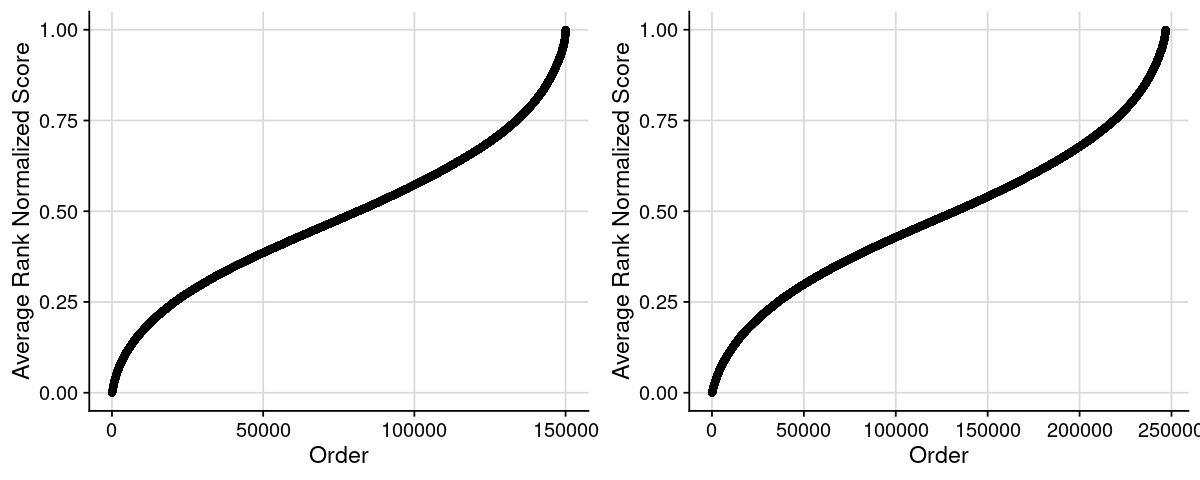

In [16]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]

    ### generate plot
    dat = dat_region_ranknorm
    gpt = ggplot(dat, aes(x=Order, y = RankNorm)) +
        geom_point() + 
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score")
    return(gpt)
})

### assign and show
lst_gpt_region_ranknorm_point = lst
options(repr.plot.height=4, repr.plot.width=10)
plot_grid(plotlist = lst, nrow = 1)

**Plot as line**

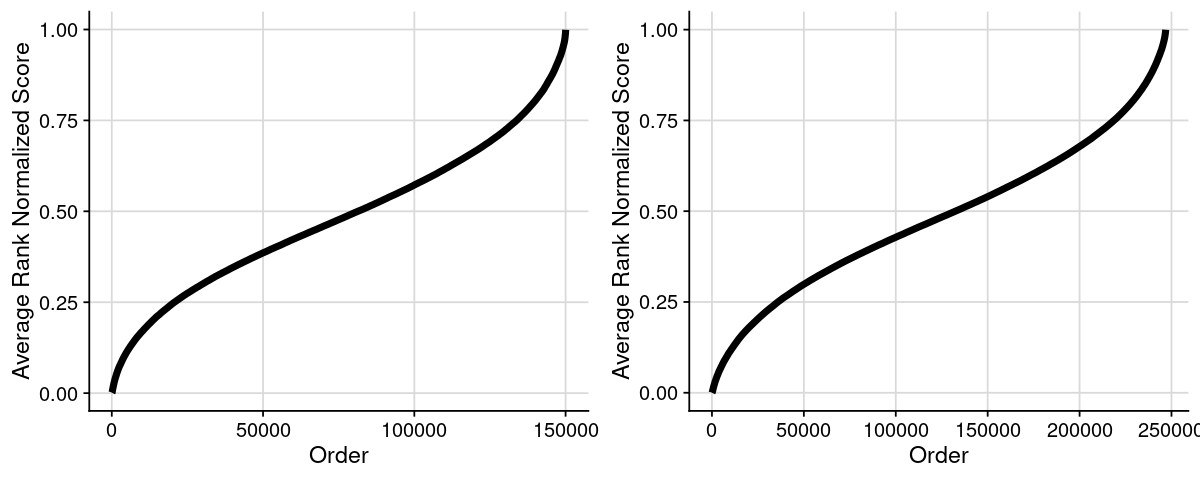

In [17]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]

    ### sample points
    dat = dat_region_ranknorm
    idx = seq(from = 1, to = nrow(dat), by = 50)
    dat = dat[idx,]

    ### generate plot
    gpt = ggplot(dat, aes(x=Order, y = RankNorm)) +
        #geom_point(size=1) + 
        geom_line(linewidth = 2) +
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score")
    return(gpt)
})

### assign and show
lst_gpt_region_ranknorm_line = lst
options(repr.plot.height=4, repr.plot.width=10)
plot_grid(plotlist = lst, nrow = 1)

**Choose the export plot**

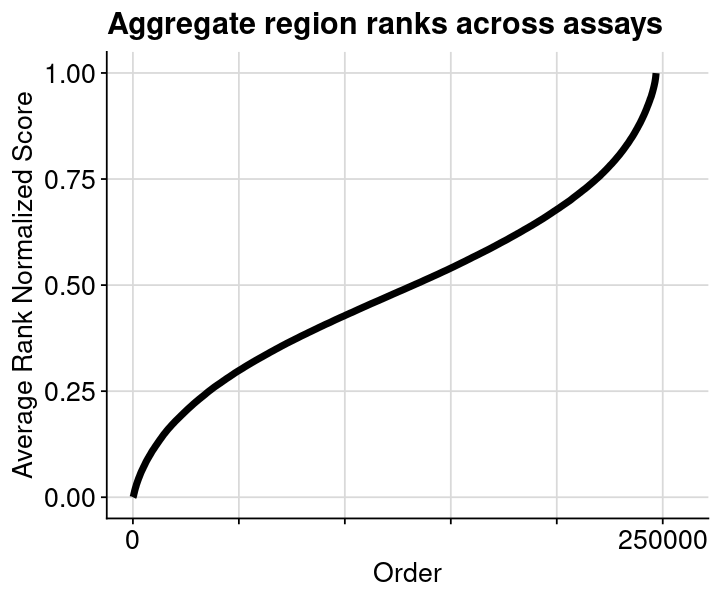

In [18]:
### get plot
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_ranknorm_line
gpt = lst[[idx]]

### update plot
theme_text = THEME_TEXT
gpt = gpt + 
    scale_x_continuous(
        breaks = c(0, 50000, 100000, 150000, 200000, 250000),
        labels = c("0", "", "", "", "", "250000"),
        expand = expansion(mult = c(0.05, 0.1))
    ) +
    scale_y_continuous(
        breaks = c(0, 0.25, 0.50, 0.75, 1.00)
    ) + 
    labs(title = "Aggregate region ranks across assays") +
    theme_text

### assign and show
gpt_export_ranknorm_line = gpt
options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

In [19]:
plt_export = gpt_export_ranknorm_line
txt_export = "fig.region_coverage_fcc.ranknorm.aggregate.line"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

## Explore: Rank norm scores with interval

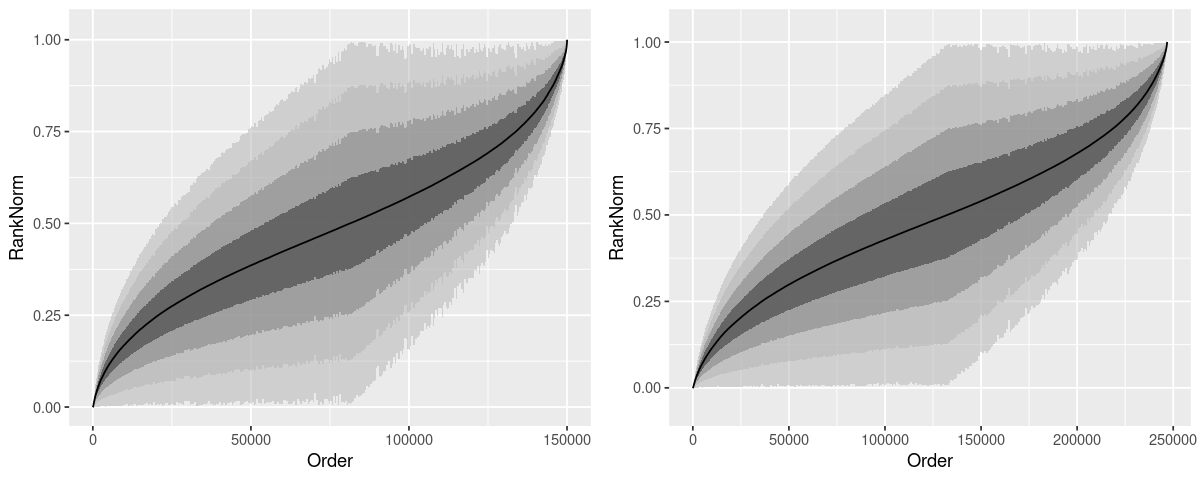

In [20]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]

    ### sample points
    #dat = dat_region_ranknorm
    #idx = seq(from = 1, to = nrow(dat), by = 50)
    #dat = dat[idx,]

    ### generate plot
    dat = dat_region_ranknorm
    dat = dat %>%
        dplyr::mutate(
            Lower_25 = RankNorm - 0.25 * RankMAD,
            Upper_25 = RankNorm + 0.25 * RankMAD,
            Lower_50 = RankNorm - 0.50 * RankMAD,
            Upper_50 = RankNorm + 0.50 * RankMAD,
            Lower_75 = RankNorm - 0.75 * RankMAD,
            Upper_75 = RankNorm + 0.75 * RankMAD,
            Lower_99 = RankNorm - 0.99 * RankMAD,
            Upper_99 = RankNorm + 0.99 * RankMAD
        )
        
    gpt = ggplot(dat, aes(x = Order)) +
        geom_ribbon(aes(ymin = Lower_99, ymax = Upper_99), fill = "grey70", alpha = 0.5) +  
        geom_ribbon(aes(ymin = Lower_75, ymax = Upper_75), fill = "grey70", alpha = 0.5) +
        geom_ribbon(aes(ymin = Lower_50, ymax = Upper_50), fill = "grey50", alpha = 0.5) +
        geom_ribbon(aes(ymin = Lower_25, ymax = Upper_25), fill = "grey30", alpha = 0.7) +
        geom_line(aes(y = RankNorm))
    return(gpt)
})

### assign and show
#lst_gpt_region_ranknorm_interval = lst
options(repr.plot.height=4, repr.plot.width=10)
plot_grid(plotlist = lst, nrow = 1)

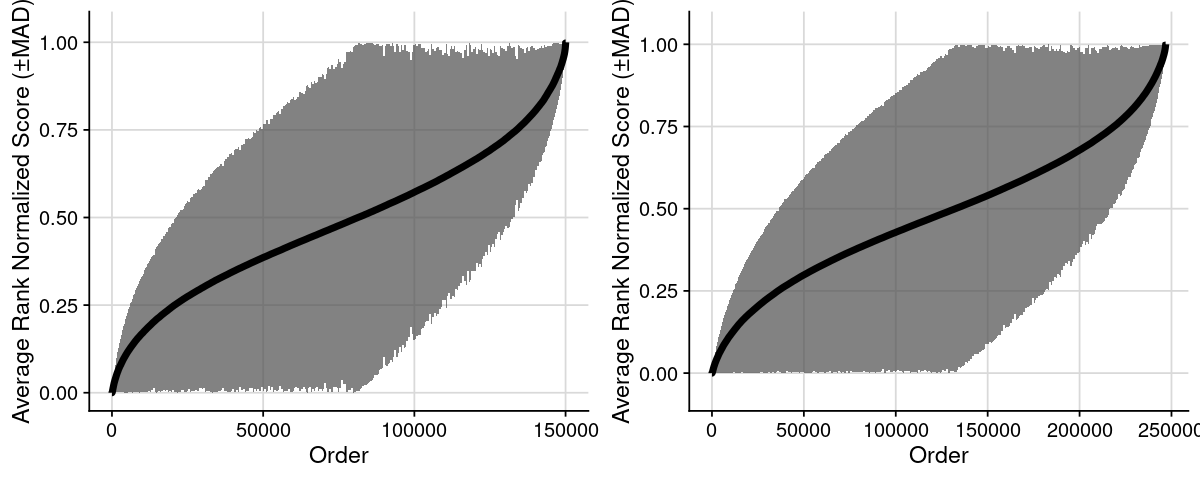

In [21]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat_region_ranknorm = lst_dat_region_ranknorm_arrange[[txt_folder]]

    #dat = dat_region_ranknorm_total
    #idx = seq(from = 1, to = nrow(dat), by = 50)
    #dat = dat[idx,]
    #dat_region_ranknorm_sample = dat
    
    ### generate plot
    dat = dat_region_ranknorm
    gpt = ggplot(dat, aes(x=Order, y = RankNorm)) +
        geom_ribbon(aes(ymin = RankNorm_Lower, ymax = RankNorm_Upper), fill = "grey30", alpha = 0.7) +
        geom_line(linewidth = 2) +
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score (±MAD)")
    return(gpt)
})

### assign and show
lst_gpt_region_ranknorm_interval = lst
options(repr.plot.height=4, repr.plot.width=10)
plot_grid(plotlist = lst, nrow = 1)

**Choose the export plot**

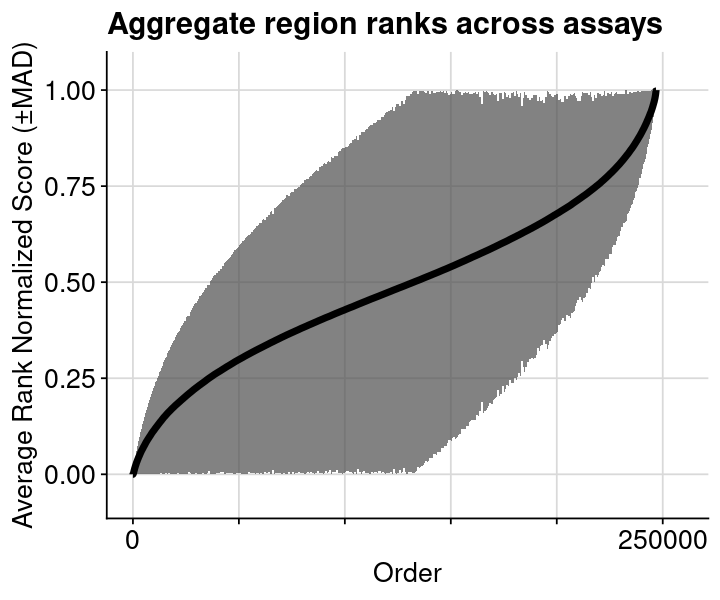

In [22]:
### get plot
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_ranknorm_interval
gpt = lst[[idx]]

### update plot
theme_text = THEME_TEXT
gpt = gpt + 
    scale_x_continuous(
        breaks = c(0, 50000, 100000, 150000, 200000, 250000),
        labels = c("0", "", "", "", "", "250000"),
        expand = expansion(mult = c(0.05, 0.1))
    ) +
    scale_y_continuous(
        breaks = c(0, 0.25, 0.50, 0.75, 1.00)
    ) + 
    labs(title = "Aggregate region ranks across assays") +
    theme_text

### assign and show
gpt_export_ranknorm_interval = gpt
options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

In [23]:
plt_export = gpt_export_ranknorm_interval
txt_export = "fig.region_coverage_fcc.ranknorm.aggregate.interval"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

## Explore: Rank norm scores with STARR/MPRA CREs

**Set plot color**

In [24]:
dat = tribble(
    ~Group,                 ~Color,    ~ItemRgb,
    "Proximal:Active",      "#e41a1c", "228,26,28",
    "Distal:Active",        "#ff7f00", "255,127,0",
    "Distal:Repressive",    "#377eb8", "55,126,184",
    "Proximal:Repressive",  "#4daf4a", "77,175,74"
)
dat_annot_color = dat
lst_txt_color = split(dat$Color, dat$Group)

**Test plot**

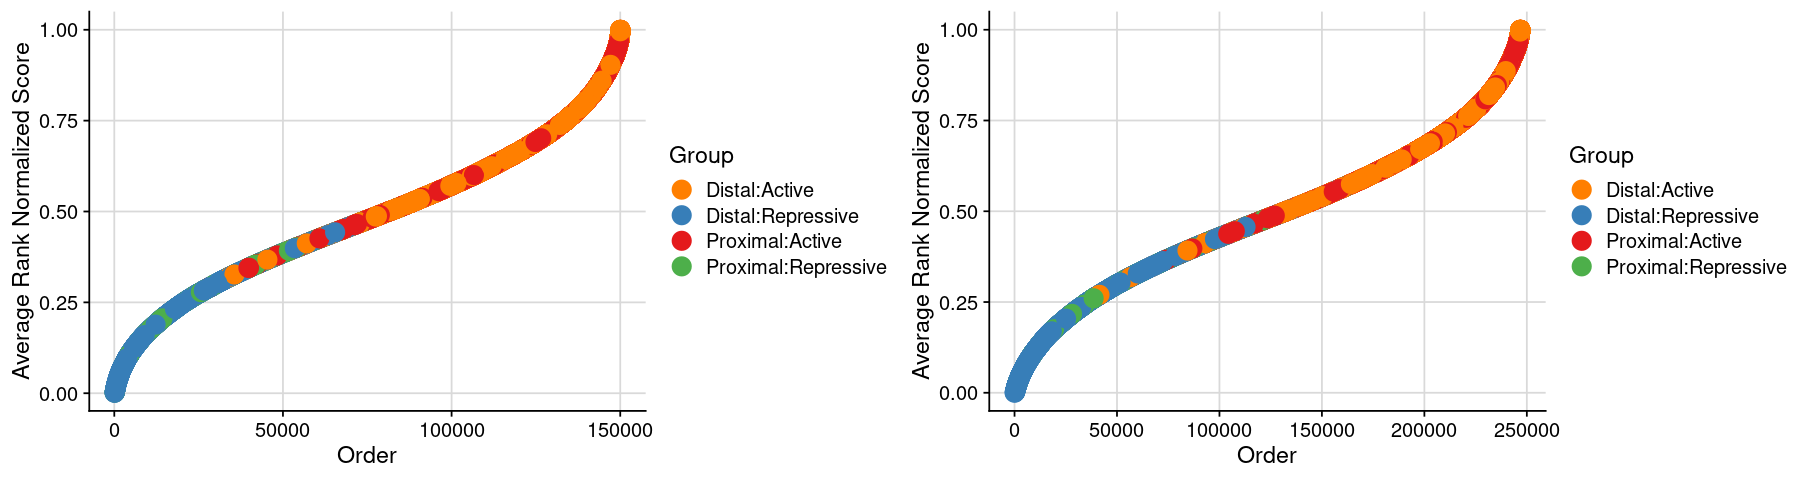

In [25]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get table
    dat_region_ranknorm = lst_dat_region_ranknorm_group[[txt_folder]]
    #vec = c("Proximal:Active", "Proximal:Repressive", "Distal:Repressive", "Distal:Active")
    #dat = dat_region_ranknorm

    ### generate plot
    dat = dat_region_ranknorm
    gpt = ggplot(dat, aes(x=Order, y = RankNorm, color = Group)) +
        geom_point(size = 5) + 
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score") +
        scale_color_manual(values = lst_txt_color)
    return(gpt)
})

### assign and show
#lst_gpt_region_ranknorm_group = lst
options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

**Generate plot**

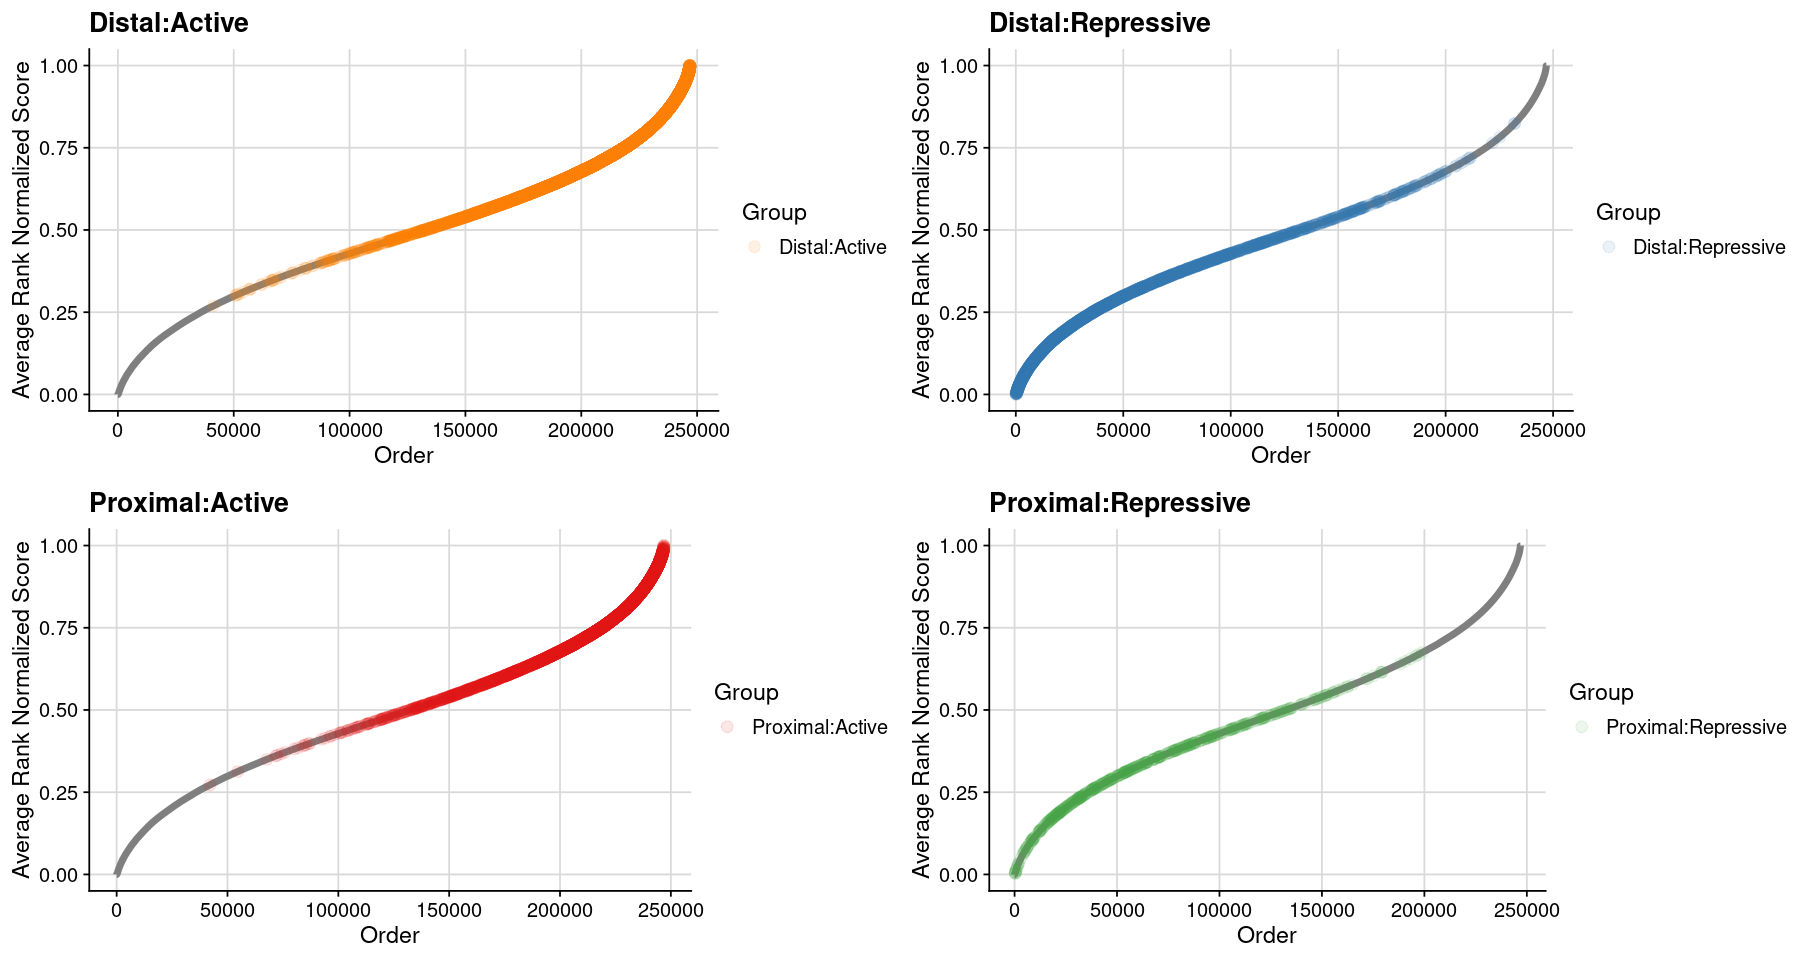

In [26]:
### get tables
idx = "fcc_astarr_macs_input_union"

lst = lst_dat_region_ranknorm_arrange
dat = lst[[idx]]
dat_region_ranknorm_total = dat

lst = lst_dat_region_ranknorm_group
dat = lst[[idx]]
dat_region_ranknorm_group = dat

### split and loop through each group
dat = dat_region_ranknorm_group
lst = split(dat, dat$Group)
lst = lapply(lst, function(dat_region_ranknorm_subset){
    ### get title
    dat = dat_region_ranknorm_subset
    vec = dat$Group
    txt = unique(vec)
    
    ### generate plot
    gpt = ggplot() +
        geom_line(
            data = dat_region_ranknorm_total,
            aes(x=Order, y = RankNorm),
            linewidth = 2,
            color = "grey50"
        ) +
        geom_point(
            data = dat_region_ranknorm_subset, 
            aes(x=Order, y = RankNorm, color = Group), 
            size  = 3,
            alpha = 0.1
        ) + 
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score", title = txt) +
        scale_color_manual(values = lst_txt_color)
    
    return(gpt)
})

### assign and show
lst_gpt_region_ranknorm_group = lst
options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 2, ncol = 2)

**Choose the export plot**

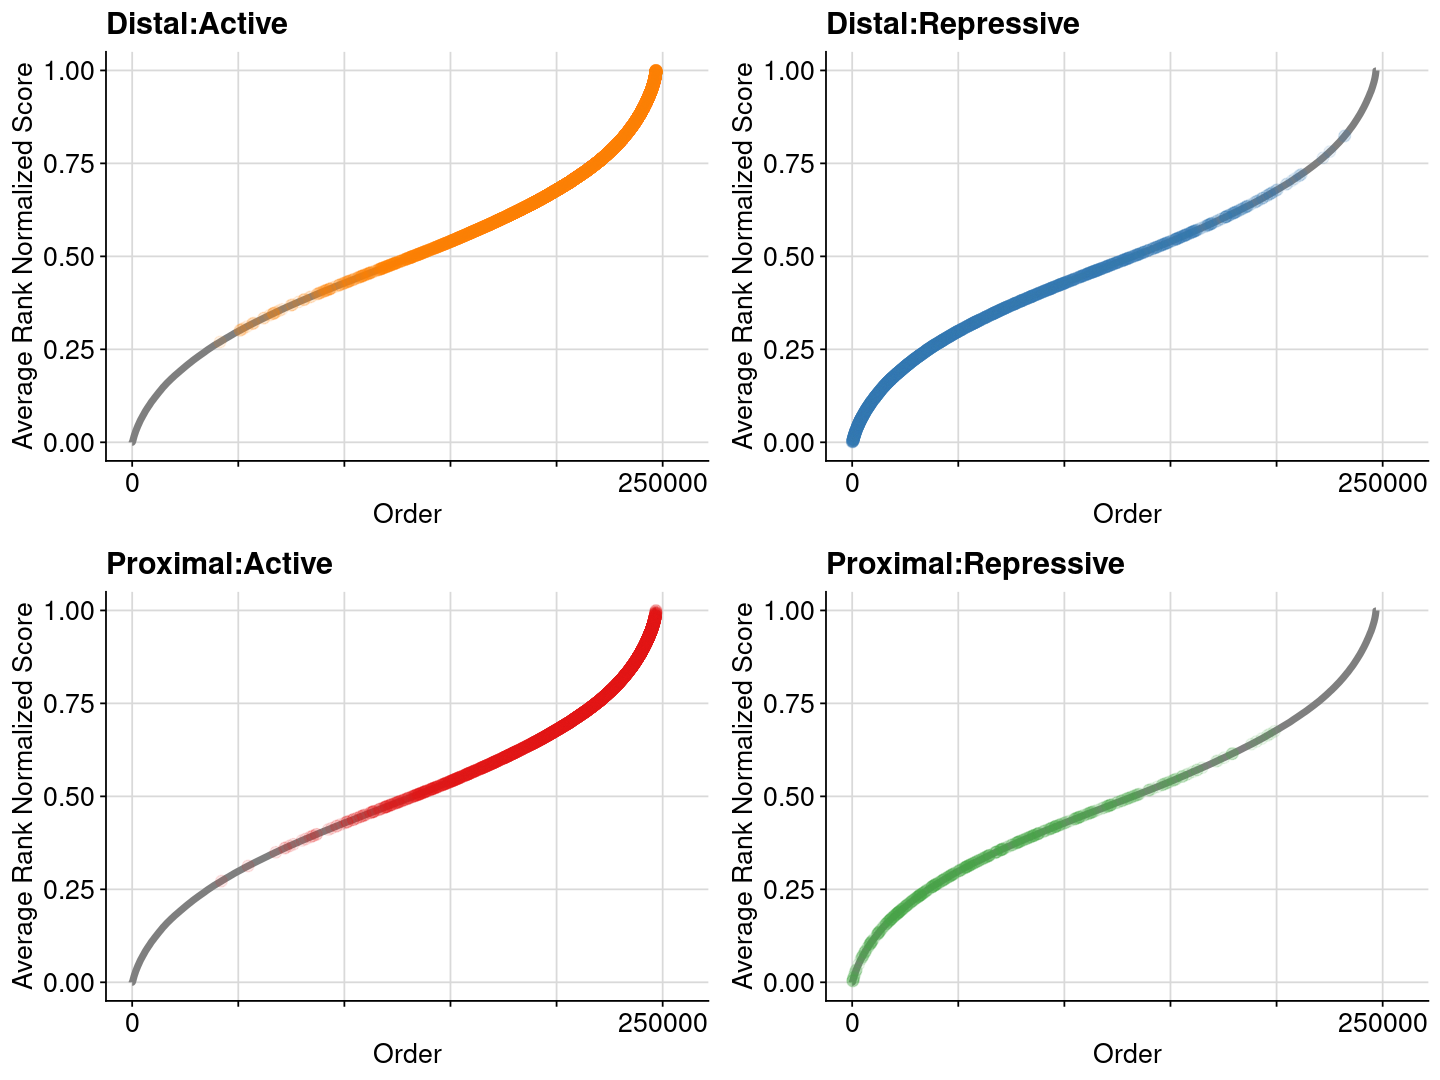

In [27]:
lst = lst_gpt_region_ranknorm_group
lst = lapply(lst, function(gpt){
    ### set plot style
    theme_text   = THEME_TEXT
    theme_legend = theme(legend.position = "none")
    
    ### update plot
    gpt = gpt + 
        scale_x_continuous(
            breaks = c(0, 50000, 100000, 150000, 200000, 250000),
            labels = c("0", "", "", "", "", "250000"),
            expand = expansion(mult = c(0.05, 0.1))
        ) +
        scale_y_continuous(
            breaks = c(0, 0.25, 0.50, 0.75, 1.00)
        ) + 
        theme_text +
        theme_legend
    return(gpt)
})

### generate grid plot
plt = plot_grid(plotlist = lst, nrow = 2, ncol = 2)

### assign and show
plt_export_ranknorm_group = plt
options(repr.plot.height=9, repr.plot.width=12)
print(plt)

In [28]:
plt_export = plt_export_ranknorm_group
txt_export = "fig.region_coverage_fcc.ranknorm.aggregate.fcc_starrmpra_group"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 9, width = 12, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = 9, width = 12, units = "in")

## Explore: Rank norm scores with known CREs

In [29]:
dat = tribble(
    ~Group,                 ~Color,    ~ItemRgb,
    "enhancer",             "#ff7f00", "255,127,0",
    "promoter",             "#e41a1c", "228,26,28",
    "promoter,enhancer",    "#e41a1c", "228,26,28"
    
)
dat_annot_color = dat
lst_txt_color = split(dat$Color, dat$Group)

In [30]:
lst_dat_region_ranknorm_cres_known[[1]] %>% head

Chrom,ChromStart,ChromEnd,Region,RankNorm,RankMAD,Pvalue,Padjust,Order,RankNorm_Lower,RankNorm_Upper,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,33868742,33871363,chr11:33868742-33871363,0.5902128,0.10002755,0.059173764,0.76275694,104294,0.4901853,0.6902404,chr11:33868743-33871363,genome_cres,LMO2 promoter,promoter,LMO2,LMO2 promoter,"Reilly et al., 2021",known CREs
chr11,33881913,33882345,chr11:33881913-33882345,0.4391102,0.26527931,1.000000000,1.00000000,64479,0.1738309,0.7043895,chr11:33881914-33882345,genome_cres,LMO2 CRE 1,enhancer,LMO2,LMO2 CRE 1,"Reilly et al., 2021",known CREs
chr11,33936819,33937819,chr11:33936819-33937819,0.8276550,0.05400664,0.005991518,0.27016178,142122,0.7736483,0.8816616,chr11:33936820-33937819,genome_cres,LMO2 CRE 2,enhancer,LMO2,LMO2 CRE 2,"Reilly et al., 2021",known CREs
chr11,33941507,33942212,chr11:33941507-33942212,0.9272433,0.02366598,0.000105406,0.04274382,148279,0.9035773,0.9509093,chr11:33941508-33942212,genome_cres,LMO2 CRE 3,enhancer,LMO2,LMO2 CRE 3,"Reilly et al., 2021",known CREs
chr11,33944532,33945260,chr11:33944532-33945260,0.8519485,0.10500329,0.000494876,0.08704770,143948,0.7469452,0.9569517,chr11:33944533-33945260,genome_cres,LMO2 CRE 4,enhancer,LMO2,LMO2 CRE 4,"Reilly et al., 2021",known CREs
chr11,5269503,5270633,chr11:5269503-5270633,0.6024471,0.23172505,0.907745352,1.00000000,107132,0.3707221,0.8341722,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs


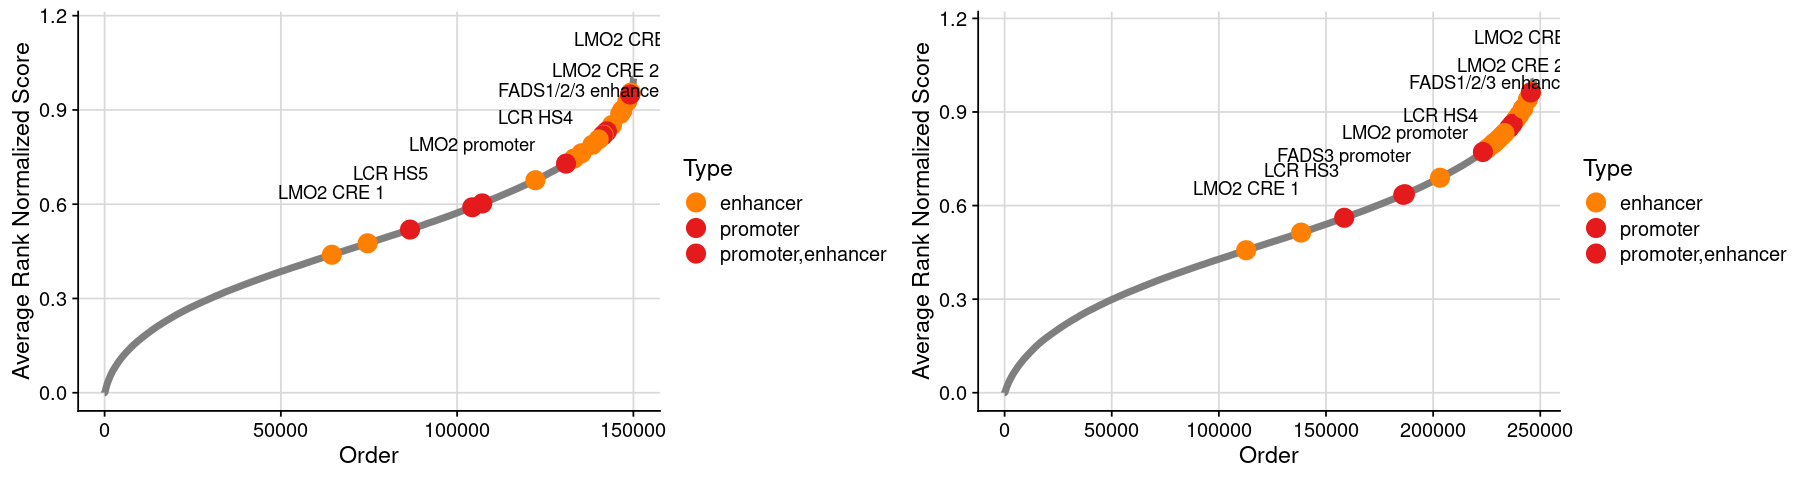

In [31]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get tables
    dat_region_ranknorm_total  = lst_dat_region_ranknorm_arrange[[txt_folder]]
    dat_region_ranknorm_subset = lst_dat_region_ranknorm_cres_known[[txt_folder]]
    
    ### filter 
    dat = dat_region_ranknorm_subset
    dat = dat %>% dplyr::filter(!(Label %in% c("LCR HS5")))
    #dat = dat %>% dplyr::filter(!(Label %in% c("LCR HS4", "LCR HS5")))
    dat_region_ranknorm_filter = dat                    

    ### generate plot
    gpt = ggplot() +
        geom_line(
            data = dat_region_ranknorm_total,
            aes(x=Order, y = RankNorm),
            linewidth = 2,
            color = "grey50"
        ) +
        geom_point(
            data=dat_region_ranknorm_filter, 
            aes(x=Order, y = RankNorm, color = Type), 
            size = 5
        ) + 
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score") +
        geom_text(
            data = dat_region_ranknorm_subset, 
            aes(x=Order, y = RankNorm),
            label=dat_region_ranknorm_subset$Label, 
            nudge_x = 0.2, 
            nudge_y = 0.2, 
            check_overlap = TRUE
        ) +
        scale_color_manual(values = lst_txt_color)
        
    return(gpt)
})

lst_gpt_region_ranknorm_cres_known = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)

**Choose the export plot**

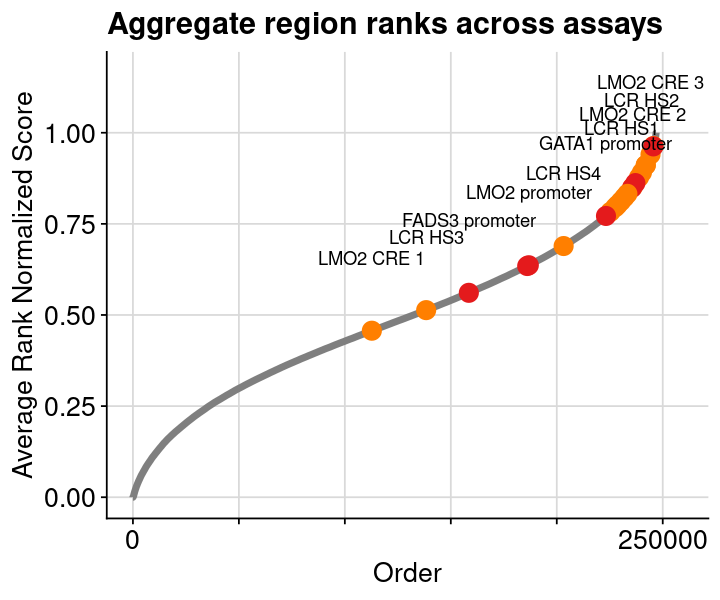

In [32]:
### get plot
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_region_ranknorm_cres_known
gpt = lst[[idx]]

### set plot style
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### update plot
gpt = gpt + 
    scale_x_continuous(
        breaks = c(0, 50000, 100000, 150000, 200000, 250000),
        labels = c("0", "", "", "", "", "250000"),
        expand = expansion(mult = c(0.05, 0.1))
    ) +
    scale_y_continuous(
        breaks = c(0, 0.25, 0.50, 0.75, 1.00)
    ) + 
    labs(title = "Aggregate region ranks across assays") +
    theme_text +
    theme_legend

### assign and show
gpt_export_ranknorm_cres_known = gpt
options(repr.plot.height=5, repr.plot.width=6)
print(gpt)

In [33]:
plt_export = gpt_export_ranknorm_cres_known
txt_export = "fig.region_coverage_fcc.ranknorm.aggregate.cres_known"

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 6, units = "in")

## Explore: Rank norm scores with tested CREs

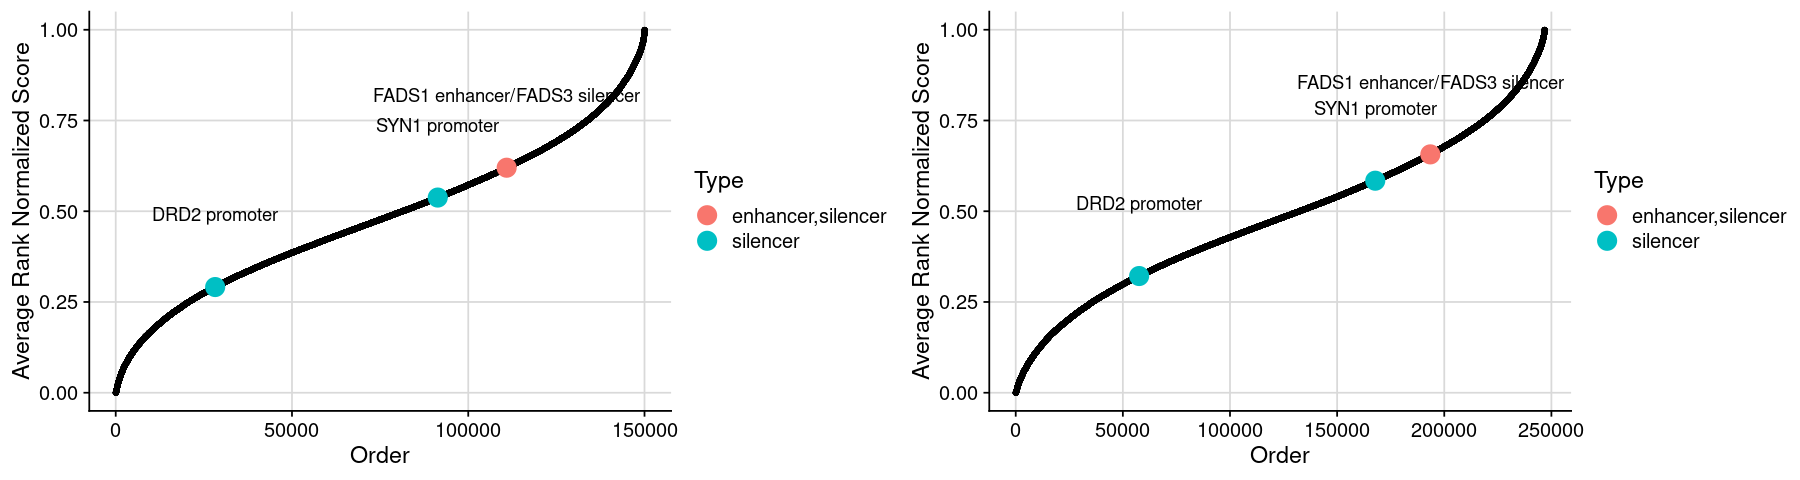

In [34]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    dat_region_ranknorm_total  = lst_dat_region_ranknorm_arrange[[txt_folder]]
    dat_region_ranknorm_subset = lst_dat_region_ranknorm_cres_tested[[txt_folder]]
    
    dat = dat_region_ranknorm_total
    idx = seq(from = 1, to = nrow(dat), by = 50)
    dat = dat[idx,]
    dat_region_ranknorm_sample = dat
    
    gpt = ggplot() +
        geom_point(data=dat_region_ranknorm_total,  aes(x=Order, y = RankNorm), size = 1) + 
        geom_point(data=dat_region_ranknorm_subset, aes(x=Order, y = RankNorm, color = Type), size = 5) + 
        theme_cowplot() + 
        background_grid() +
        labs(x = "Order", y = "Average Rank Normalized Score") +
        geom_text(
            data = dat_region_ranknorm_subset, 
            aes(x=Order, y = RankNorm),
            label=dat_region_ranknorm_subset$Label, 
            nudge_x = 0.2, 
            nudge_y = 0.2, 
            check_overlap = T
        ) 
        
    return(gpt)
})

lst_gpt_region_ranknorm = lst

options(repr.plot.height=4, repr.plot.width=15)
plot_grid(plotlist = lst, nrow = 1)